## Importing Packages

In [1]:
import fastf1
import fastf1.plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fastf1.plotting.setup_mpl()

## Loading Session Data

In [2]:
year = 2018
race = "British Grand Prix"

session = fastf1.get_session(year, race, 'R')
session.load()

req         WARNING 	DEFAULT CACHE ENABLED! (886.64 MB) C:\Users\odath\AppData\Local\Temp\fastf1


core           INFO 	Loading data for British Grand Prix - Race [v3.7.0]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

## Loading and Preparing Lap Data

In [3]:
laps = session.laps
laps = laps.sort_values(['Driver', 'LapNumber'])
laps['LapTimeSeconds'] = laps['LapTime'].dt.total_seconds()
laps.head()

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeSeconds
104,0 days 00:09:03.408000,ALO,14,0 days 00:01:45.688000,1.0,NaN,NaT,NaT,NaT,0 days 00:00:41.859000,...,McLaren,0 days 00:07:17.544000,2018-07-08 13:13:17.555,21,11.0,False,,False,False,105.688
105,0 days 00:10:40.308000,ALO,14,0 days 00:01:36.900000,2.0,1.0,NaT,NaT,0 days 00:00:30.128000,0 days 00:00:40.140000,...,McLaren,0 days 00:09:03.408000,2018-07-08 13:15:03.419,12,11.0,False,,False,True,96.900
106,0 days 00:12:16.183000,ALO,14,0 days 00:01:35.875000,3.0,1.0,NaT,NaT,0 days 00:00:30.228000,0 days 00:00:39.170000,...,McLaren,0 days 00:10:40.308000,2018-07-08 13:16:40.319,12,11.0,False,,False,True,95.875
107,0 days 00:13:52.657000,ALO,14,0 days 00:01:36.474000,4.0,1.0,NaT,NaT,0 days 00:00:30.018000,0 days 00:00:39.591000,...,McLaren,0 days 00:12:16.183000,2018-07-08 13:18:16.194,1,11.0,False,,False,True,96.474
108,0 days 00:15:29.454000,ALO,14,0 days 00:01:36.797000,5.0,1.0,NaT,NaT,0 days 00:00:30.232000,0 days 00:00:39.590000,...,McLaren,0 days 00:13:52.657000,2018-07-08 13:19:52.668,1,12.0,False,,False,True,96.797


## Compound color map

In [4]:
COMPOUND_COLORS = {
    'SOFT': '#FF3333',
    'MEDIUM': '#FFD700',
    'HARD': "#C6BFBF",
    'INTERMEDIATE': '#39B54A',
    'WET': '#0077FF'
}

## Race Statergy Comparison between different drivers

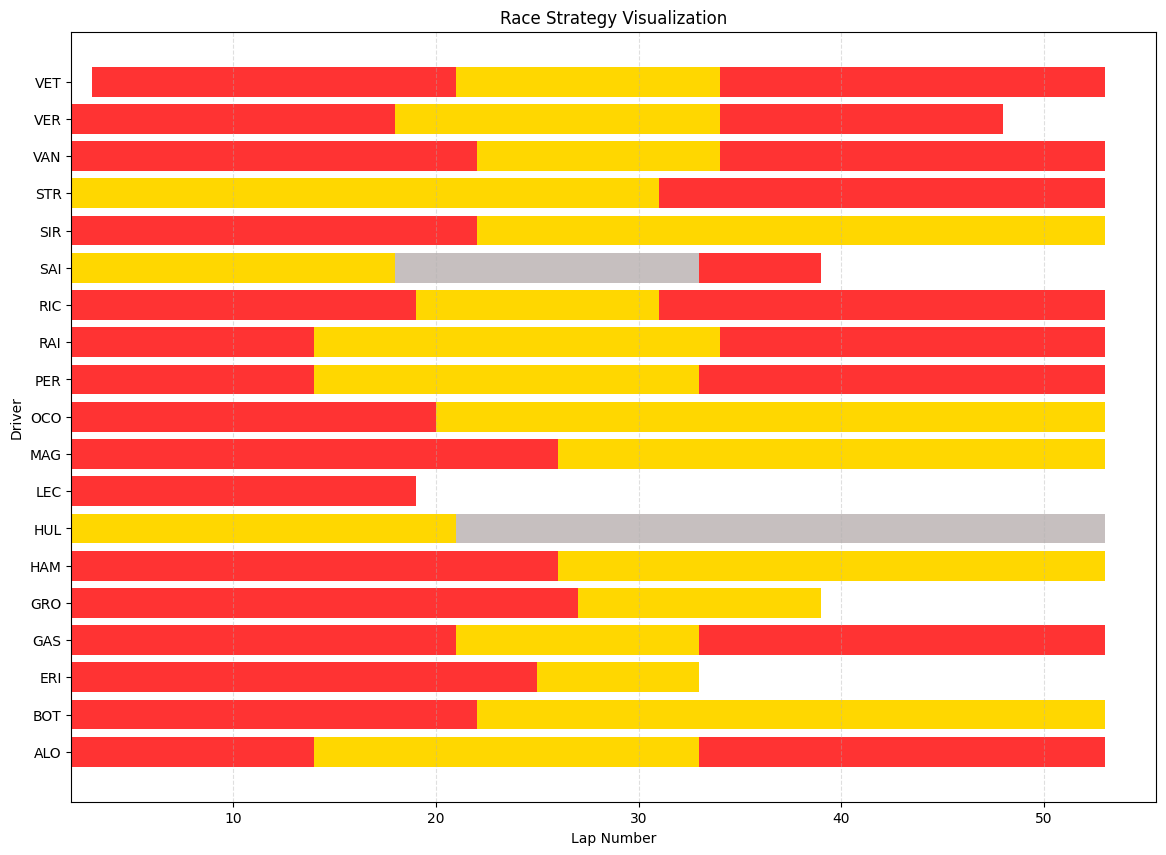

In [5]:
drivers = laps['Driver'].unique()

fig, ax = plt.subplots(figsize=(14,10))

for driver in drivers:
    stints = laps[laps['Driver'] == driver].groupby('Stint')
    
    for stint, data in stints:
        compound = data['Compound'].iloc[0]
        ax.barh(
            driver,
            len(data),
            left=data['LapNumber'].min(),
            color=COMPOUND_COLORS.get(compound, '#AAAAAA')
        )

ax.set_xlabel("Lap Number")
ax.set_ylabel("Driver")
ax.set_title("Race Strategy Visualization")
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()
